# Introduction to Data Science – Project Proposals
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 7 2025, 11:59pm.

In this project report we will mention basic information about the members, background and motivation for choosing the direction of the project, setting the project objectives, asking the main questions and setting learning objectives, performing data description and acquisition, ethical considerations and potential harms of the direction, performing data cleaning and processing then exploratory analysis including the analytical methods used, and finally developing a timeline for the group project.


# Project Title: Microeconomic Analysis of Wheat Pricing and Market Behavior in Kansas: Exploring Local Agricultural Trends

## Team Members:
NAME(EMAIL, UID)
- **YUYANG YAO** (<u1400651@umail.utah.edu>, u1400651)
- **NICLAS SCOTT HOLMAN** (<u1281501@umail.utah.edu>, u1281501)
- **WEITONG NIU** (<u1345736@umail.utah.edu>, u1345736)

## Background and Motivation

The motivation for this project arises from the ongoing importance of wheat as a staple agricultural commodity, particularly in local markets such as Kansas. Numerous factors, including production levels, supply chain issues, weather, export-import dynamics, and local consumption patterns, influence wheat pricing. As wheat production plays a crucial role in Kansas state's local crop economies, understanding the microeconomic factors behind its pricing and market behavior is critical for optimizing and efficient decision-making by local farmers, policymakers, and businesses like demand, supply, equilibrium price, and quantity trend forecast. 

Our team is interested in understanding how local factors, such as environmental and weather conditions, Market Structure (wheat should ), production efficiency (technology ex), and trade policies (tariffs and tax ex), affect wheat prices in Kansas (we may only focus on a few of them). In recent years, fluctuations in agricultural commodity prices have led to significant economic consequences for both producers and consumers in the region. By exploring these local dynamics, we will strive to provide valuable insights that could help mitigate risks associated with price volatility and optimize agricultural practices in the region. We are also interested in the seasonal trend of the price of wheat.

Through this analysis, we hope to contribute to a broader understanding of the agricultural markets in Kansas (ex-test if the model fits more generally), which can potentially be applied to other regions with similar economic and agricultural structures. Furthermore, this study aligns with current trends in using microeconomic theory to analyze agricultural markets and predict future market behaviors, particularly in the context of policy changes or shifts in production patterns due to supply and demand shifts together with elasticity and so on.

## Project Objectives

- **Primary Questions**:
  - How do local factors, such as production levels and stocks, weather factors including rainfall and temperature, **imports, and exports (needs to add)**, influence wheat prices in Kansas? How are these variables correlated?
  - What are the key determinants of wheat supply and demand in Kansas's wheat market? I.e. except for sales and production, what other factors matter to my model?
  - Can we identify significant trends in wheat pricing and market behavior based on historical data?
  - How do we interpolate or adjust annual production data to obtain monthly or seasonal production data to match prices (Most reports and data are annual)?
   - How to do the missing sales in 2024 or other data influence the trend in regression? How to fix it?

- **Learning Objectives**:
  - Develop expertise in applying microeconomic concepts, such as supply (supply shock) and demand estimation models, market equilibrium distributions (maybe parametric or nonparametric), and price elasticity, to an agricultural market context.
  - Gain experience in working with time series data :(optional: Brownian motion (BM) (need to decompose, helpful for price volatility as diffusion matrix), exponential smoothing, ARIMA, including understanding seasonal trends and their impact on pricing to provide the approximate distribution type for regression (hopefully linear) and visualization.
  - Understand the role of local market dynamics within broader national and global agricultural trade systems (especially Kansas, which has the highest wheat production in the United States).
  - Learn how to conduct data cleaning and preparation (including quarterly stock info, not montly), do exploratory analysis, and develop forecasting models using historical agricultural data.
  - more details in the analysis part

In [279]:
from prophet import Prophet

from bs4 import BeautifulSoup
import urllib.request

import pandas as pd
import scipy as sc
import numpy as np
import urllib.request

import statsmodels.formula.api as sm
from scipy.stats import lognorm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

df_what_price_usa_recently=pd.read_csv('what_price_usa_recently.csv', encoding='utf-8')
df_what_price_usa_recently.rename(columns={"Value": "Price_usa_monthly"}, inplace=True)
print(df_what_price_usa_recently.info())
#df_what_price_usa_recently.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Program            121 non-null    object 
 1   Year               121 non-null    int64  
 2   Period             121 non-null    object 
 3   Week Ending        0 non-null      float64
 4   Geo Level          121 non-null    object 
 5   State              121 non-null    object 
 6   State ANSI         0 non-null      float64
 7   Ag District        0 non-null      float64
 8   Ag District Code   0 non-null      float64
 9   County             0 non-null      float64
 10  County ANSI        0 non-null      float64
 11  Zip Code           0 non-null      float64
 12  Region             0 non-null      float64
 13  watershed_code     121 non-null    int64  
 14  Watershed          0 non-null      float64
 15  Commodity          121 non-null    object 
 16  Data Item          121 non

In [281]:
df_kansasdata_1=pd.read_csv('df_kansasdata_1_copy_1.csv', encoding='utf-8')

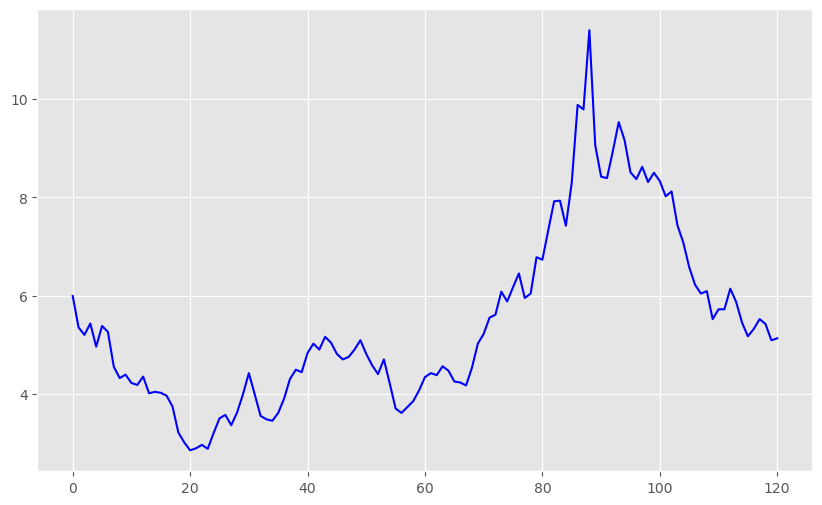

In [200]:
plt.plot(df_kansasdata_1.index, df_kansasdata_1["Price_Kansas_monthly"], color="blue")
plt.show()

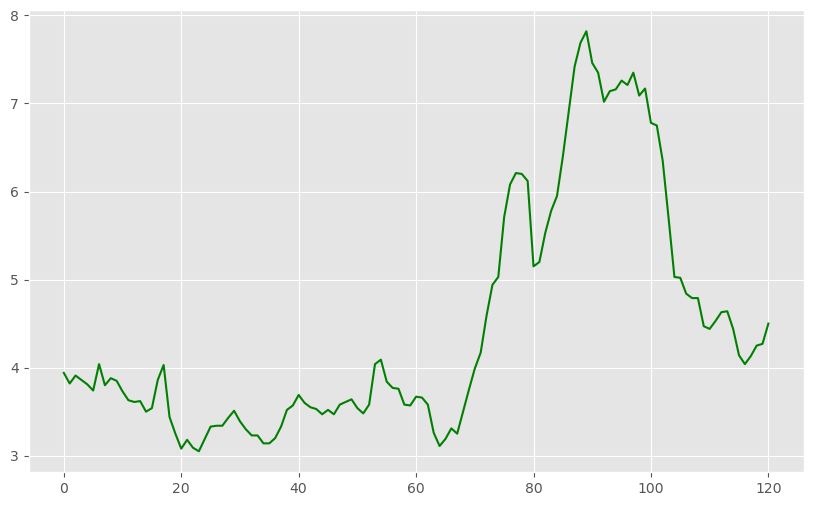

In [202]:
plt.plot(df_kansasdata_1.index, df_kansasdata_1["Price_corn_monthly"], color='green')
# pattern similar to wheat
plt.show()

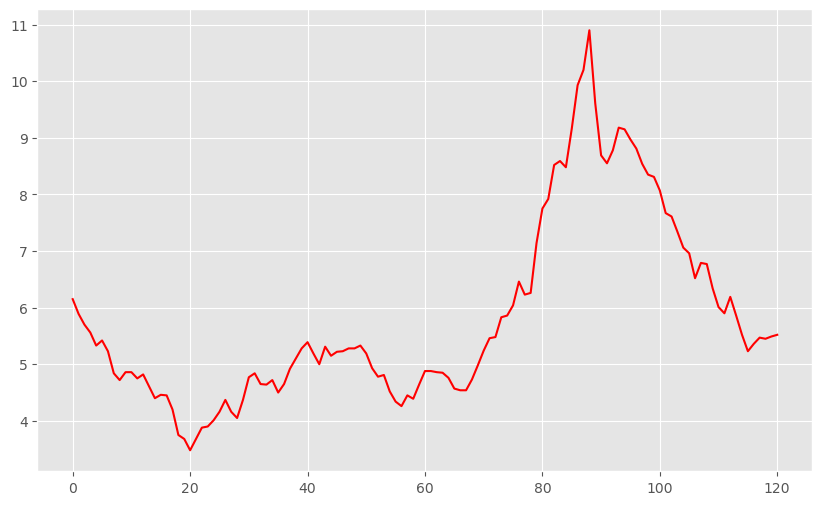

In [204]:
plt.plot(df_kansasdata_1.index, df_kansasdata_1["Price_usa_monthly"], color='red') # I didn't chnage x to be moth yet
plt.show()

the overall pattern looks similar to Kansas wheat price as the leading production of wheat in Kansas.

In [206]:
df_production_k_1=pd.read_csv('WHEAT-AcreageYieldandProductionIrrigatedNonIrrigated-2025-03-27.csv', encoding='utf-8') 
#anual not monthly
#print(df_production_k_1.info())
df_production_k_1.head()

,YEAR,LOCATION,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,PRODN PRACTICE,AREA PLANTED in ACRES,AREA HARVESTED in ACRES,PRODUCTION in $,PRODUCTION in BU,YIELD in BU / ACRE,PRODUCTION in PCT BY TYPE
0,2015,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"9,200,000","8,700,000","1,525,806,000","321,900,000",37,
1,2016,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"8,500,000","8,200,000","1,495,680,000","467,400,000",57,
2,2017,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,600,000","6,950,000","1,357,752,000","333,600,000",48,
3,2018,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,700,000","7,300,000","1,367,582,000","277,400,000",38,
4,2019,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,100,000","6,700,000","1,421,472,000","348,400,000",52,


Above df contain some diff kinds of wheat

In [210]:
df_production_only_k_1=pd.read_csv('wheat production kansas anual.csv', encoding='utf-8') #anual not monthly
#print(df_production_k_1.info())
df_production_only_k_1.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2024,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"307,450,000",NaN
1,SURVEY,2023,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"201,250,000",NaN
2,SURVEY,2022,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"244,200,000",NaN
3,SURVEY,2021,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"364,000,000",NaN
4,SURVEY,2020,YEAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"281,250,000",NaN


In [212]:
df_production_usa_1=pd.read_csv('wheat usa production total.csv', encoding='utf-8')
df_production_usa_1.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2024,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"1,971,301,000",NaN
1,SURVEY,2023,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"1,803,942,000",NaN
2,SURVEY,2022,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"1,649,713,000",NaN
3,SURVEY,2021,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"1,646,254,000",NaN
4,SURVEY,2020,YEAR,NaN,NATIONAL,US TOTAL,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"1,819,673,000",NaN


stock: [https://quickstats.nass.usda.gov/results/6A4F6845-3BCC-3FCA-A5A4-FCEAF7B44F80} download csv file has erros, will fix later
[DEFAULT]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665
[InternetShortcut]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665

More: Price received parity refers to the price that farmers receive for their product in relation to a reference or fair price. It compares actual market prices to expected or ideal prices.

## Exploratory Analysis (stock lastly)

We will begin our exploratory data analysis (EDA) by examining the trends in wheat production (supply), sales (demand), exports in export, and prices over time. Specifically, we will (initial aig zag price in line plots already displayed above):
- Create time series plots (multiple modules) to visualize how each variable changes monthly, seasonally, and maybe yearly (may decompose seasonal trends and separate noise using various modules as stated below).
- Generate correlation matrices with heatmap and mutual scatterplots (pairplot) to explore the (linear) relationships between wheat price, supply, demand, and price factors.
- Use histograms to analyze the distribution of wheat pricing trend data.
(- Altair with interactive plots to visualize relationships without regression may be difficult)

(-We may also add wheat types' trends by class to understand how different wheat types behave in the market)

## Part I time series plot


In [214]:
from prophet import Prophet
date_l_range = pd.date_range(start='2015-01-01', end='2025-01-01', freq='MS') #https://www.geeksforgeeks.org/python-pandas-date_range-method/
df_prophet_1=pd.DataFrame({'ds': date_l_range, 'y': df_kansasdata_1 ['Price_Kansas_monthly']})
df_prophet_1.head()#desired df for using Prophet

,ds,y
0,2015-01-01,5.99
1,2015-02-01,5.35
2,2015-03-01,5.20
3,2015-04-01,5.43
4,2015-05-01,4.96


In [216]:
model_prophet_1=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95)
#95% CI, or making confidence level higher, defalt 80%
model_prophet_1.fit(df_prophet_1)

16:27:26 - cmdstanpy - INFO - Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1] done processing


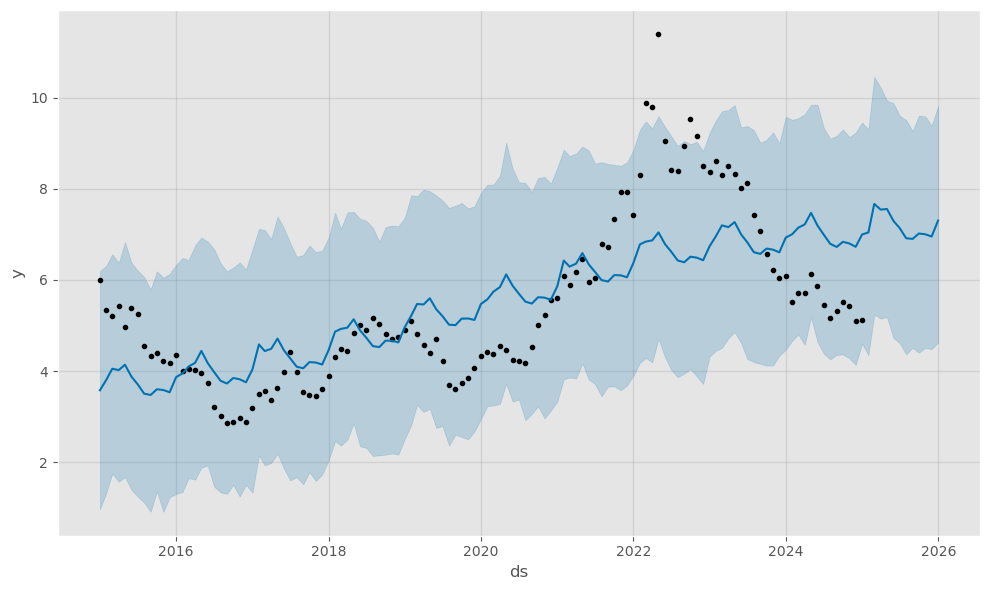

In [218]:
#future_1=model_prophet_1.make_future_dataframe(df_prophet_1, periods=12, freq='M')
future_1=model_prophet_1.make_future_dataframe(periods=12, freq='ME') #Feq='ME' the model forecasts 12 additional months beyond the training data
#https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe
forecast_1=model_prophet_1.predict(future_1)
fig_prophet_1=model_prophet_1.plot(forecast_1)#explain later
plt.show()

## Explain
-1. Blue curve is the trend curve (with seasonal pattern), black dots are exact price, and blue shade region is for confidence bounds (interval).
-2. This prediction is accurate except a few outliers in 2022 (blue shaded region cpatured most except 3 points)
-3. The graph shows stead upward trend (linear)
-4. Below, 1st trend data without seasonal zigzag, 2nd graph is a particular montly trend pattern (with a bit zigzag).

In [222]:
from prophet.diagnostics import cross_validation#evaluate future 12 month prediction https://facebook.github.io/prophet/docs/diagnostics.html
df_eva_cross_val_pro_1= cross_validation(model_prophet_1, horizon='365 days', period='30 days', initial='3285 days')
#ex initial is train data,by 9 years , gap between prediction is 30 days (a month), horizon is remaining 1 year, cutoff below is the cutoff point for my train test point

  0%|          | 0/1 [00:00<?, ?it/s]

16:29:01 - cmdstanpy - INFO - Chain [1] start processing
16:29:04 - cmdstanpy - INFO - Chain [1] done processing


In [224]:
df_eva_cross_val_pro_1

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-02-01,8.990472,6.950315,11.038666,5.52,2024-01-02
1,2024-03-01,9.119097,7.280201,11.160001,5.72,2024-01-02
2,2024-04-01,9.190371,7.170682,11.315959,5.72,2024-01-02
3,2024-05-01,9.403610,7.455239,11.441780,6.14,2024-01-02
4,2024-06-01,9.168890,7.172951,11.144673,5.87,2024-01-02
5,2024-07-01,9.048584,7.052634,11.000619,5.45,2024-01-02
6,2024-08-01,8.897473,6.902576,10.830150,5.17,2024-01-02
7,2024-09-01,8.854832,6.862282,10.787811,5.32,2024-01-02
8,2024-10-01,9.016288,6.926776,11.053963,5.52,2024-01-02
9,2024-11-01,9.042120,6.845360,11.062628,5.42,2024-01-02


In [226]:
# above is predicted value of last yrar, now let us evaluate last year's performence 
from prophet.diagnostics import performance_metrics
metrics_eva_prophet_1 = performance_metrics(df_eva_cross_val_pro_1)
print(metrics_eva_prophet_1[['rmse', 'mape', 'mae']])# get diff values of metircs

        rmse      mape       mae
0   3.470472  0.628709  3.470472
1   3.399097  0.594248  3.399097
2   3.470371  0.606708  3.470371
3   3.263610  0.531533  3.263610
4   3.298890  0.561991  3.298890
5   3.598584  0.660291  3.598584
6   3.727473  0.720981  3.727473
7   3.534832  0.664442  3.534832
8   3.496288  0.633386  3.496288
9   3.622120  0.668288  3.622120
10  3.969603  0.779883  3.969603
11  4.259932  0.830396  4.259932


The rmse and mae colose to 0 is accurate. And mape close to 0% is good. The valuation score looks not perfect. I will fix it and optimiaze later (in analysis I suppose this part for recent 3 block of code is for analysis). We may break into diff pieces to try this for the final submission version.

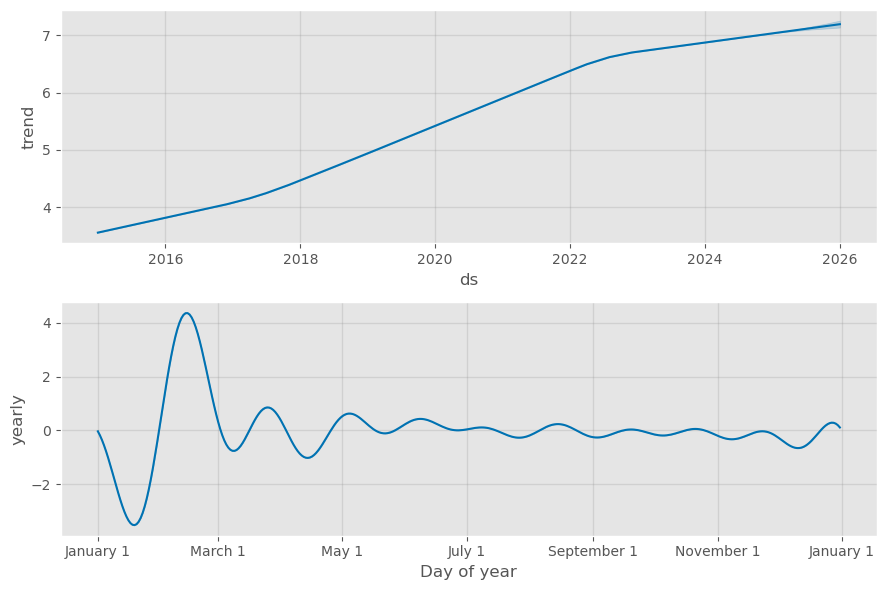

In [228]:
fig_prophet_2=model_prophet_1.plot_components(forecast_1)#explain later
plt.show()

1. Looks like linear trend but with a bit rate changing
2. for monthly, Feb is higher, but later a 20 year peiord monthly trend, more exact seasonal patterm (12 a bit higher, 1-5 higher)

In [230]:
from scipy.stats import lognorm #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
column_name_phrophet_1=list(forecast_1.axes[1])
print("head:",column_name_phrophet_1)
forecast_1.tail()

head: ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
128,2025-08-31,7.142384,4.512117,9.266258,7.110655,7.177137,-0.241835,-0.241835,-0.241835,-0.241835,-0.241835,-0.241835,0.0,0.0,0.0,6.900549
129,2025-09-30,7.155564,4.404335,9.608956,7.116845,7.196530,-0.136648,-0.136648,-0.136648,-0.136648,-0.136648,-0.136648,0.0,0.0,0.0,7.018916
130,2025-10-31,7.169183,4.507894,9.589052,7.123341,7.216059,-0.167847,-0.167847,-0.167847,-0.167847,-0.167847,-0.167847,0.0,0.0,0.0,7.001335
131,2025-11-30,7.182363,4.480899,9.384877,7.130112,7.238351,-0.229745,-0.229745,-0.229745,-0.229745,-0.229745,-0.229745,0.0,0.0,0.0,6.952618
132,2025-12-31,7.195982,4.628372,9.810829,7.137527,7.258867,0.107086,0.107086,0.107086,0.107086,0.107086,0.107086,0.0,0.0,0.0,7.303068


## df
- **explain title of column**:
-  additive_terms: Additional components (seasonality, holidays)
- y_hat (final predicted value): trend + additive_terms + multiplicative_terms (none multiplicative here). The blue line in 1st picture
- ‌yhat_lower/yhat_upper‌：predicted vlaue CI. The blue shaded region in 1st picture
- yearly:  annual seasonal trend pattern (e.g., winter peaks, summer fall lower data points),this is incorporated to  additive_terms (this is why prophet is strong to predict price trend)
-last 11 (rows) months are predicted vlaues.

In [232]:
y_trend_1=forecast_1['trend']
#shape, loc, scale = lognorm.fit(y_trend_1, floc=0)
#x_trend_1=np.linspace(, , len(y_trend_1))
df_log_1 = pd.DataFrame(y_trend_1)
df_log_1['log_price_trend']=np.log(df_log_1['trend'])# log transformation to linear,and add this column afraid of exponentioal trend
df_log_1['x'] = np.arange(1, len(df_log_1) + 1)
y_trend_ols_1=sm.ols(formula="log_price_trend~ x ", data=df_log_1).fit()
y_trend_ols_1.rsquared

0.9653233480457482

In [234]:
#plt.plot(df_log_1.index, df_log_1['log_price_trend'], color='green')
plt.scatter(x=df_log_1.index,y=df_log_1['log_price_trend'],c='r',marker='s')#very nice liinear pattern
plt.plot(df_log_1.index,y_trend_ols_1.predict(),color='blue',linewidth=1)#y should have same index has x

#plt.show()


In [236]:
df_original_1=pd.DataFrame(y_trend_1)
df_original_1['x'] = np.arange(1, len(df_log_1) + 1)
y_trend_ols_1_2 = sm.ols(formula="trend~ x ", data=df_original_1).fit()
y_trend_ols_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trend   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6409.
Date:                Thu, 03 Apr 2025   Prob (F-statistic):          4.03e-113
Time:                        16:29:34   Log-Likelihood:                 45.265
No. Observations:                 133   AIC:                            -86.53
Df Residuals:                     131   BIC:                            -80.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4420      0.030    113.765      0.000       3.382       3.502
x              0.0314      0.000     80.059      0.000       0.031       0.032
==============================================================================
Omnibus:                        2.926   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.063
Skew:                          -0.114   Prob(JB):                        0.357
Kurtosis:                       2.435   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

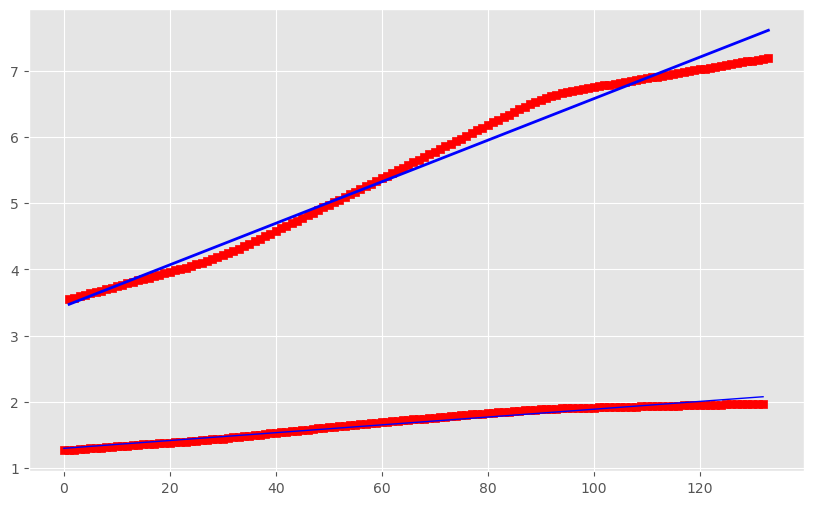

In [238]:
plt.scatter(x=df_original_1['x'] ,y=df_original_1['trend'],c='r',marker='s')#very nice liinear pattern
plt.plot(df_original_1['x'] ,y_trend_ols_1_2.predict(),color='blue',linewidth=2)#y should have same index has x

plt.show()

R^sqaure is around 0.980 and F statsitic p-val is very small, and the intercept and coef's p-val very small. **linear trend** given by Prophet model.

In [240]:
model_prophet_non_lin_1=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95, growth='logistic')
#logistivc for non linear trend
df_prophet_1['cap'] = 10# max forecasted values cannot exceed 10 (remove one outlier 13 in origial dataset)

model_prophet_non_lin_1.fit(df_prophet_1)


16:29:45 - cmdstanpy - INFO - Chain [1] start processing
16:29:45 - cmdstanpy - INFO - Chain [1] done processing


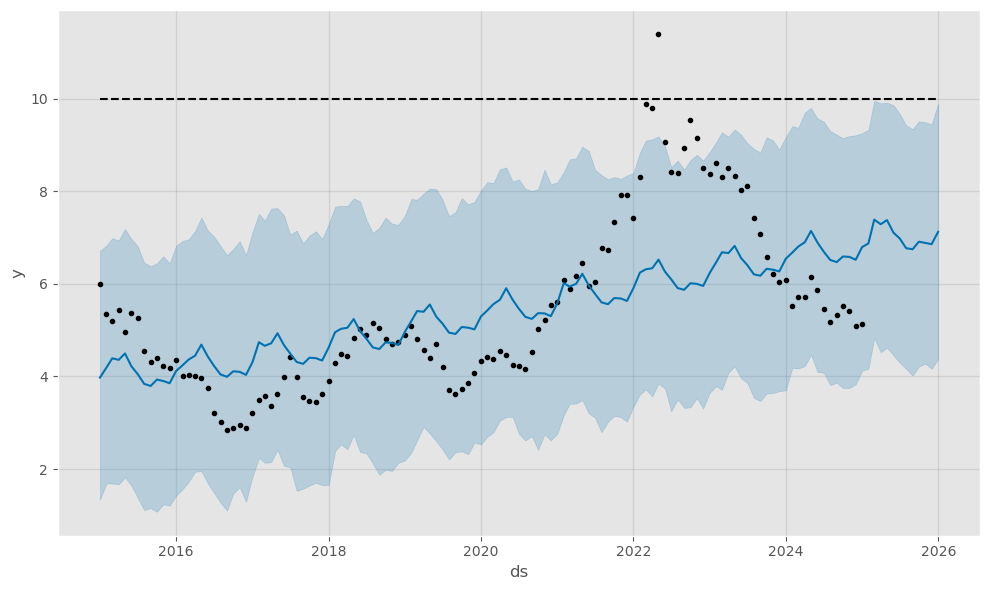

In [244]:
future_1_non_l=model_prophet_non_lin_1.make_future_dataframe(periods=12, freq='ME')

future_1_non_l['cap'] = 10
forecast_1_non_l=model_prophet_non_lin_1.predict(future_1_non_l)#need to add cap before prediction
fig_prophet_non_l_1=model_prophet_non_lin_1.plot(forecast_1_non_l)#explain later
plt.show()

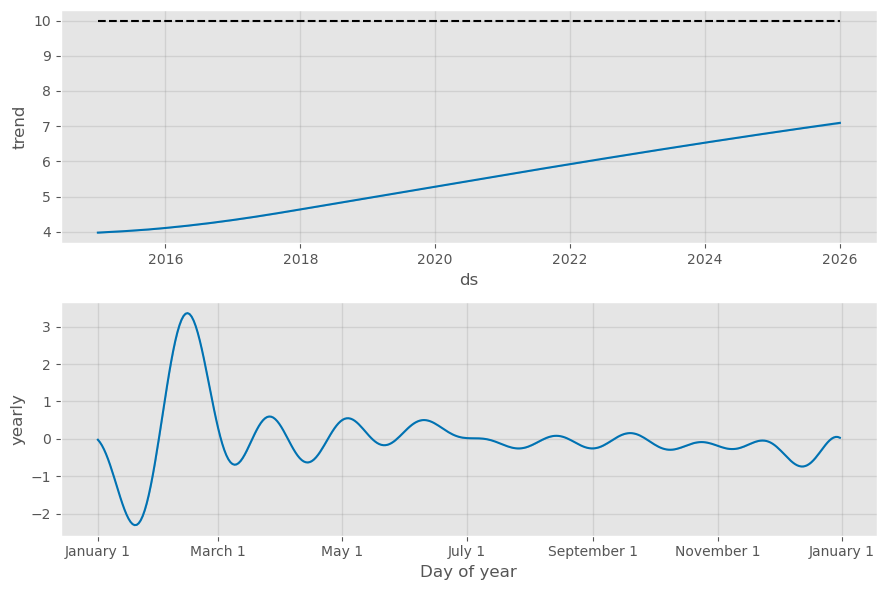

In [246]:
fig_prophet_non_l_2=model_prophet_non_lin_1.plot_components(forecast_1_non_l)
plt.show()

In [248]:
y_trend_nonl_1=forecast_1_non_l['trend']
df_original_nonl_1=pd.DataFrame(y_trend_nonl_1)
df_original_nonl_1['x'] = np.arange(1, len(df_original_nonl_1) + 1)
y_trend_ols_nonl_1 = sm.ols(formula="trend~ x ", data=df_original_nonl_1).fit()
y_trend_ols_nonl_1.rsquared

0.9977511305194456

C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_28780\2933637633.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_wheat_price_kansas_2_copy = df_wheat_price_kansas_2_copy.groupby('Year').apply(lambda group: group)


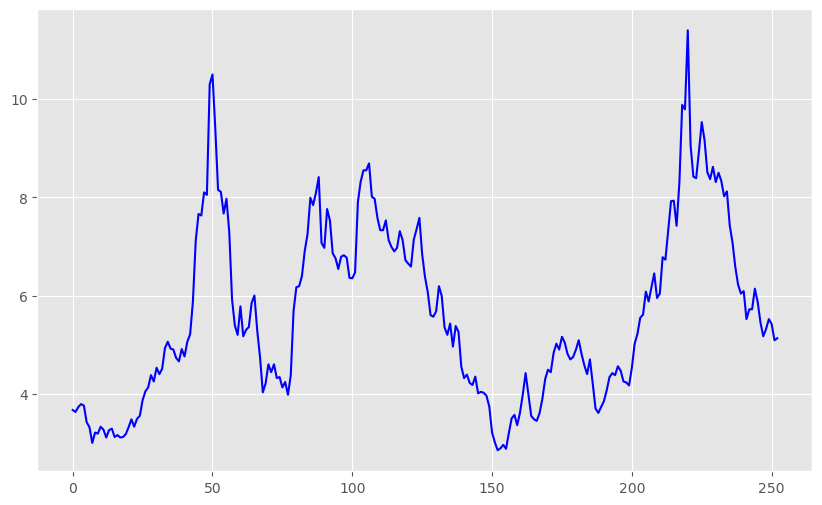

In [250]:
df_wheat_price_kansas_2 = pd.read_csv('kansas wheat price monthly2.csv', encoding='utf-8')
df_wheat_price_kansas_2.rename(columns={"Value": "Price_Kansas_monthly"}, inplace=True)
df_wheat_price_kansas_2_copy=df_wheat_price_kansas_2
month_l_order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_wheat_price_kansas_2_copy=df_wheat_price_kansas_2_copy.sort_values(by='Period',key=lambda x: pd.Categorical(x, 
            categories=month_l_order, ordered=True))# sorty by column 'Period'. key is a function needs to apply to period column. swap each value x o be pd.Categorical... 
#https://www.w3schools.com/python/pandas/ref_df_sort_values.asp | for sort_values 
#https://www.geeksforgeeks.org/python-pandas-categorical/ |for pd.Categorical
df_wheat_price_kansas_2_copy = df_wheat_price_kansas_2_copy.groupby('Year').apply(lambda group: group)
df_wheat_price_kansas_2_copy.reset_index(drop=True, inplace=True)# removes the extra indexing 2015,..,2025
plt.plot(df_wheat_price_kansas_2_copy.index, df_wheat_price_kansas_2_copy["Price_Kansas_monthly"], color="blue")
plt.show()
#df_wheat_price_kansas_2_copy.head()

recent 20 years data show a more  cyclical trend.

16:30:15 - cmdstanpy - INFO - Chain [1] start processing
16:30:15 - cmdstanpy - INFO - Chain [1] done processing


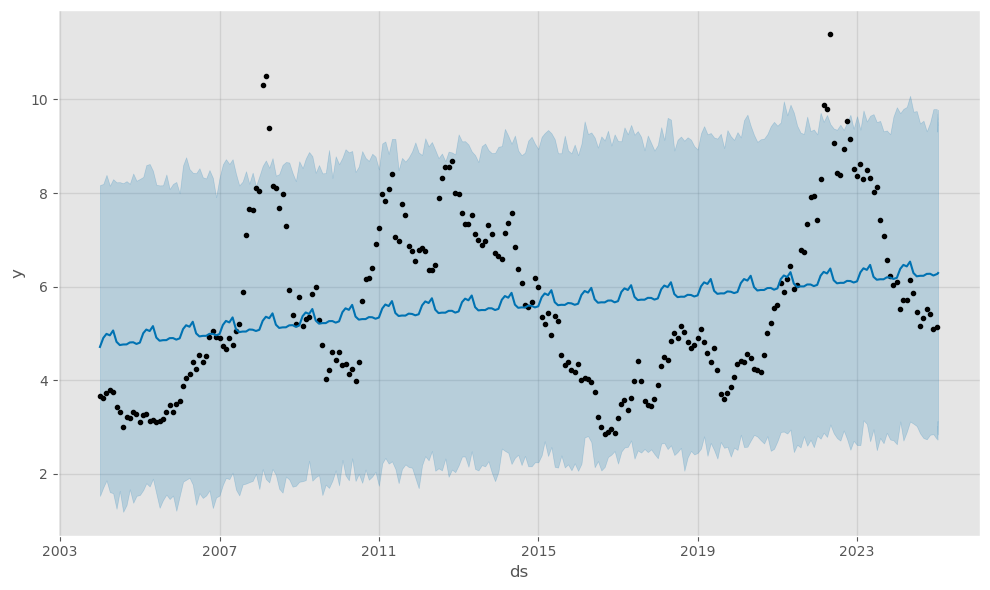

In [252]:
date_l_range_2 = pd.date_range(start='2004-01-01', end='2025-01-01', freq='MS') #https://www.geeksforgeeks.org/python-pandas-date_range-method/
df_prophet_2=pd.DataFrame({'ds': date_l_range_2, 'y': df_wheat_price_kansas_2_copy ['Price_Kansas_monthly']})
df_prophet_2.head()#desired df for using Prophet
model_prophet_2=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95)
model_prophet_2.fit(df_prophet_2)
future_2=model_prophet_2.make_future_dataframe(periods=12)
#https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe
forecast_2=model_prophet_2.predict(future_2)
fig_prophet_3_1=model_prophet_2.plot(forecast_2)#explain later
plt.show()

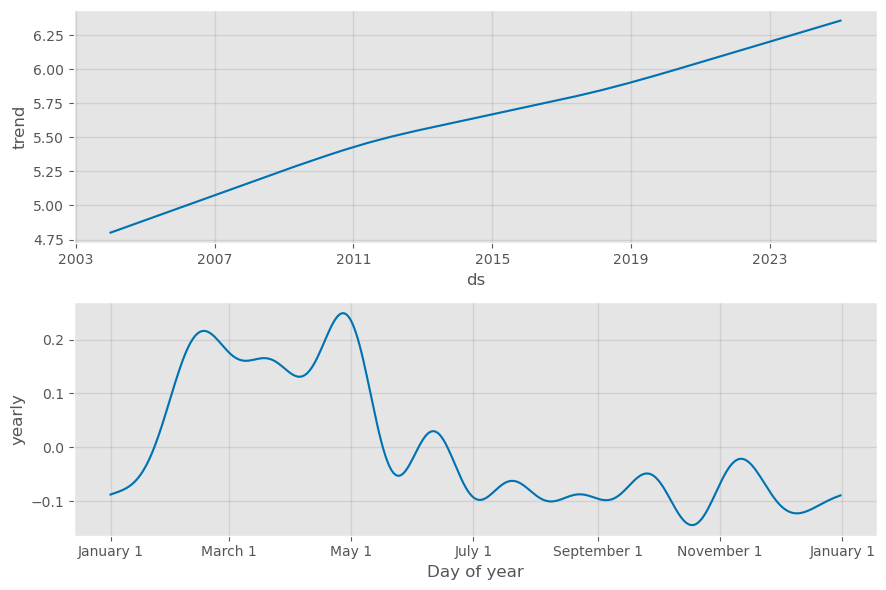

In [254]:
fig_prophet_3_2=model_prophet_2.plot_components(forecast_2)#explain later
plt.show()

In [256]:
y_trend_2=forecast_2['trend'][:100]
y_trend_2=forecast_2['trend']
df_original_2=pd.DataFrame(y_trend_2)
df_original_2['x'] = np.arange(1, len(y_trend_2) + 1)
y_trend_ols_3 = sm.ols(formula="trend~ x ", data=df_original_2).fit()
y_trend_ols_3.rsquared

0.9941393685264949

1. Trend showed a roughly steady linear growth before around 2013, followed by a slow and then fast growth rate thereafter, but still linear. 
2.
The first plot shows a steady upward trend in wheat prices over time** Need to check the distribution of residual later, if is it close to straight line than linear.** 
The second plot: higher prices in winter and spring. This could be due to transportation cost in winter and no production or harvest in winter expectation of future wheat shortness will shift supply left, and demand right, increase price in the short run. The pricce will drop at Jue bacause **kansas wheat will harverst at June and July**, increasing supply and expectation of future wheat surplus.‌

## Part II heatmaps


In [258]:
column_name_1=list(df_kansasdata_1.axes[1])
print(column_name_1)
#print(df_kansasdata_1.info())
column_name_2_numeric=['Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale',  
                       'Sales_Kansas_monthly', 'Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production']
df_kansasdata_2=df_kansasdata_1[column_name_2_numeric]
print(df_kansasdata_2.info())
df_kansasdata_2.head()

['Year', 'Period', 'State', 'Commodity', 'Data Item', 'Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale', 'Period_sale', 'Sales_Kansas_monthly', 'Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production', 'Annual_Production']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price_Kansas_monthly  121 non-null    float64
 1   Price_usa_monthly     121 non-null    float64
 2   Price_corn_monthly    121 non-null    float64
 3   Date                  121 non-null    int64  
 4   Rainfall_Kansas       121 non-null    float64
 5   Avg_Tem_k             121 non-null    float64
 6   Year_sale             113 non-null    float64
 7   Sales_Kansas_monthly  121 non-null    float64
 8   Import_usa_monthly    121 non-null    int64  
 9   Export_usa_monthly    121 non-nul

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production
0,5.99,6.15,3.94,201501,0.37,32.1,2015.0,6.0,87211,409161,2.053333e+07
1,5.35,5.89,3.82,201502,0.83,31.2,2015.0,2.0,81717,557790,2.053333e+07
2,5.20,5.70,3.91,201503,0.49,46.8,2015.0,3.0,91894,570799,2.053333e+07
3,5.43,5.56,3.86,201504,2.76,56.4,2015.0,2.0,67606,563568,2.053333e+07
4,4.96,5.33,3.81,201505,8.28,61.7,2015.0,3.0,62447,462809,2.053333e+07


In [260]:
#scale data avoid big number bias
from sklearn.preprocessing import StandardScaler

scaler_obj= StandardScaler()
scaled_data_1 = scaler_obj.fit_transform(df_kansasdata_2)
df_kansasdata_2_scaled = pd.DataFrame(scaled_data_1, columns=df_kansasdata_2.columns)
df_kansasdata_2_scaled.head()

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production
0,0.299432,0.203733,-0.384728,-1.584700,-1.103137,-1.370161,-1.548734,-0.259455,1.657521,-0.837726,-0.937221
1,-0.055559,0.045631,-0.474065,-1.581255,-0.851268,-1.422486,-1.548734,-0.710123,1.391995,0.298116,-0.937221
2,-0.138760,-0.069905,-0.407062,-1.577810,-1.037432,-0.515516,-1.548734,-0.597456,1.883851,0.397532,-0.937221
3,-0.011185,-0.155036,-0.444286,-1.574365,0.205486,0.042619,-1.548734,-0.710123,0.710007,0.342272,-0.937221
4,-0.271882,-0.294896,-0.481509,-1.570920,3.227913,0.350756,-1.548734,-0.597456,0.460672,-0.427741,-0.937221


In [262]:
correlation_matrix = df_kansasdata_2_scaled.corr()
correlation_matrix

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production
Price_Kansas_monthly,1.000000,0.983178,0.940493,0.639577,-0.106759,-0.002731,0.711959,-0.045128,0.263616,0.398033,-0.482371
Price_usa_monthly,0.983178,1.000000,0.933905,0.610991,-0.155167,-0.059238,0.699720,-0.086330,0.283072,0.398445,-0.423428
Price_corn_monthly,0.940493,0.933905,1.000000,0.627411,-0.092015,0.045757,0.706792,0.022127,0.197869,0.450166,-0.373028
Date,0.639577,0.610991,0.627411,1.000000,-0.127150,-0.019024,0.999920,-0.003168,0.216760,0.240948,-0.477769
Rainfall_Kansas,-0.106759,-0.155167,-0.092015,-0.127150,1.000000,0.570309,-0.138546,0.289414,-0.121349,0.058882,0.044770
Avg_Tem_k,-0.002731,-0.059238,0.045757,-0.019024,0.570309,1.000000,-0.048406,0.621348,-0.055452,0.241054,0.040733
Year_sale,0.711959,0.699720,0.706792,0.999920,-0.138546,-0.048406,1.000000,-0.043252,0.128268,0.337904,-0.518927
Sales_Kansas_monthly,-0.045128,-0.086330,0.022127,-0.003168,0.289414,0.621348,-0.043252,1.000000,0.038165,0.059176,0.021041
Import_usa_monthly,0.263616,0.283072,0.197869,0.216760,-0.121349,-0.055452,0.128268,0.038165,1.000000,-0.089302,-0.409744
Export_usa_monthly,0.398033,0.398445,0.450166,0.240948,0.058882,0.241054,0.337904,0.059176,-0.089302,1.000000,-0.046107


[Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4'), Text(6.0, 0, '6'), Text(8.0, 0, '8'), Text(10.0, 0, '10'), Text(12.0, 0, '12')]


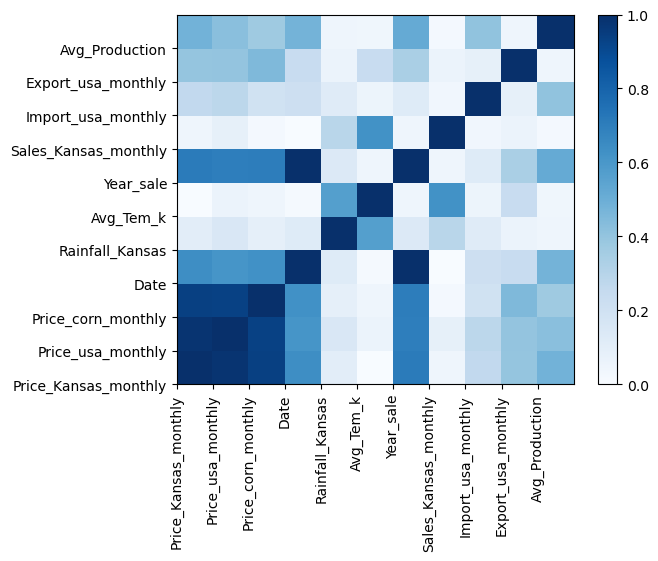

In [264]:
correlation_matrix_2 =correlation_matrix.abs()  
plt.style.use('default')
heatmap_type = plt.pcolor(correlation_matrix_2, cmap=plt.cm.Blues, vmin=0, vmax=1)#pseudocolor plot,cmap (colormap) 
# plot the legend on the side#lengend is juts the colorbar, giving values for color intensity颜色深浅
plt.colorbar(heatmap_type)

#labels

label_l=column_name_2_numeric
ax_1 = plt.gca()#retreive current labels (object). The class object of ax_1 is matplotlib.axes.Axes,
#which is a subclass of matplotlib.artist.Artist in the inheritance hierarchy.
print(ax_1.get_xticklabels())#why alreay column_name_2??
#ax_1.set_xticks(ax.get_xticks())  # Keep original x positions
#ax_1.set_yticks(ax.get_yticks())  # Keep original y positions

ax_1.set_xticks(range(len(column_name_2_numeric))) # Set the x_label positions 0-16 without matching the original (automated) one, so x, y axes has loc:0,1,...,ln(column_name_2))
ax_1.set_yticks(range(len(column_name_2_numeric)))  # Set the y_ticket positions
ax_1.set_xticklabels(label_l,rotation='vertical') #sets  labels for the x-axis tickects,# and rortate the x_stick to be vertical to ve readable
ax_1.set_yticklabels(label_l)


plt.show()

## Explain 1 
- 1. Sales_Kansas_monthly and Price_Kansas_monthly has strong linear relationship
  2. Rainfall_Kansas and Avg_Tem_k has strong linear relationship. So for dynamics need to consider them both.
  3. ‌Export_usa_monthly and  Import_usa_monthly has strong linear relationship. So global trend both import and export are similar.
  4. Rainfall and tempreture and sale has some relationship (**easy mkt dynamic example**). Rainfall should have relationship with prodcution but here it is averaged, so not very obvious. This is intermediate r.v. Usually, these two whether conditions have more relationship with production as it will shift supply as supply shock like 2022 drought and relatively higher temp in kansas. Then shift in supply curve (to the left) will influence quantity_saled (demanded) and price simultaneiously as equilibrium price increase, Q drops. (Expectation of demand also shift to the right)
  5. ‌Price_corn_monthly and  Price_uwheat_monthly and price_kansas_monthly are closely related (linear)‌‌‌. This shows substituion of wheat (corn)'s price highly affect itself.
  6. Interesting thing: export of wheat has some linear relationship with kansas monthly corn price. As mentioned they are substitutions. Also export has linear relationship with all prices listed above. Export is one of the most important sale of wheat as a commodity crop.
## 2
- 1. Save up place, I will not generate a heatmap not with abs. So there prices strong positive relationship. Pirce of substitue and price of itselt is postive related, in line with microeconomics.
  2. Avg tem and rainfall as negative relation with price and sale as exaplained as supply shock affect before. While these wether conditoins have positive relationship with production.
  3. export of wheat has pos relationship with corn price (of course with all price listed). Substitution Q_d's affect is strong here.
  4. May use most factors listed above to do regression. The most important fatcor on Q_d and Q_s is not too lin related to price which confused me. They should work (maybe suggest non linear trend, like sin or cosin cyclical trend together with the global wheat price and may split up time zone to fit diff models
  5. Avg production has some negative relationship with all price factors. If supply increase, price will drop as explained before in the short run. Also sales (Q_d) almost has no linear relationship with price fatcors, may show Q_d inelastic, whicle supply is more elastic.

In [266]:
df_kansasdata_1_annual= df_kansasdata_1.groupby('Year')[['Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale',  
                       'Sales_Kansas_monthly', 'Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production']].sum().reset_index()
df_kansasdata_1_annual['Price_Kansas_monthly']=df_kansasdata_1_annual['Price_Kansas_monthly']/12
df_kansasdata_1_annual['Price_usa_monthly']=df_kansasdata_1_annual['Price_usa_monthly']/12
df_kansasdata_1_annual['Price_corn_monthly']=df_kansasdata_1_annual['Price_corn_monthly']/12
df_kansasdata_1_annual['Rainfall_Kansas']=df_kansasdata_1_annual['Rainfall_Kansas']/12
df_kansasdata_1_annual['Avg_Tem_k']=df_kansasdata_1_annual['Avg_Tem_k']/12
df_kansasdata_1_annual['Rainfall_Kansas']=df_kansasdata_1_annual['Rainfall_Kansas']/12
df_kansasdata_1_annual

,Year,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production
0,2015,4.935833,5.275833,3.834167,2418078,0.227569,56.300000,24180.0,96.000000,704212,5627953,2.904417e+08
1,2016,3.493333,4.109167,3.437500,2419278,0.213056,57.166667,24192.0,100.000000,472552,5346321,4.067750e+08
2,2017,3.645000,4.436667,3.297500,2420478,0.201597,56.500000,24204.0,101.000000,690382,6058312,3.893500e+08
3,2018,4.695000,5.143333,3.502500,2421678,0.221181,54.600000,24216.0,107.000000,784936,5387386,3.008167e+08
4,2019,4.304167,4.743333,3.708333,2422878,0.250208,53.816667,24228.0,97.000000,419452,6227516,3.188167e+08
5,2020,4.595000,4.857500,3.536667,2424078,0.179514,55.616667,24240.0,105.000000,448312,6281955,3.092292e+08
6,2021,6.572500,6.840000,5.545000,2425278,0.189236,56.116667,24252.0,98.000000,398874,7227405,3.295208e+08
7,2022,9.066667,9.300000,7.131667,2426478,0.147500,55.150000,24264.0,95.000000,722419,8322590,2.941167e+08
8,2023,7.635000,7.669167,6.173333,2427678,0.177778,56.341667,24276.0,93.000000,871831,6082274,2.191458e+08
9,2024,5.585833,5.799167,4.397500,2428878,0.190417,57.558333,10120.0,107.444444,768645,5867903,2.632000e+08


In [268]:
df_kansasdata_2_annual=df_kansasdata_1_annual[column_name_2_numeric]
correlation_matrix_annual_1 = df_kansasdata_2_annual.corr()
correlation_matrix_annual_1

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production
Price_Kansas_monthly,1.000000,0.994982,0.988857,0.666756,0.362498,0.658744,0.557612,0.593561,0.656678,0.847475,0.322849
Price_usa_monthly,0.994982,1.000000,0.991465,0.722278,0.427888,0.714407,0.616561,0.651288,0.680150,0.887854,0.408855
Price_corn_monthly,0.988857,0.991465,1.000000,0.695613,0.398863,0.690593,0.598240,0.613999,0.625628,0.871403,0.397952
Date,0.666756,0.722278,0.695613,1.000000,0.901248,0.997781,0.850317,0.986002,0.678803,0.901233,0.854176
Rainfall_Kansas,0.362498,0.427888,0.398863,0.901248,1.000000,0.892444,0.793063,0.898267,0.526015,0.686637,0.836977
Avg_Tem_k,0.658744,0.714407,0.690593,0.997781,0.892444,1.000000,0.832121,0.985350,0.686515,0.890668,0.857318
Year_sale,0.557612,0.616561,0.598240,0.850317,0.793063,0.832121,1.000000,0.794402,0.468876,0.800872,0.812621
Sales_Kansas_monthly,0.593561,0.651288,0.613999,0.986002,0.898267,0.985350,0.794402,1.000000,0.666985,0.856970,0.857352
Import_usa_monthly,0.656678,0.680150,0.625628,0.678803,0.526015,0.686515,0.468876,0.666985,1.000000,0.570190,0.363013
Export_usa_monthly,0.847475,0.887854,0.871403,0.901233,0.686637,0.890668,0.800872,0.856970,0.570190,1.000000,0.738691


[Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4'), Text(6.0, 0, '6'), Text(8.0, 0, '8'), Text(10.0, 0, '10'), Text(12.0, 0, '12')]


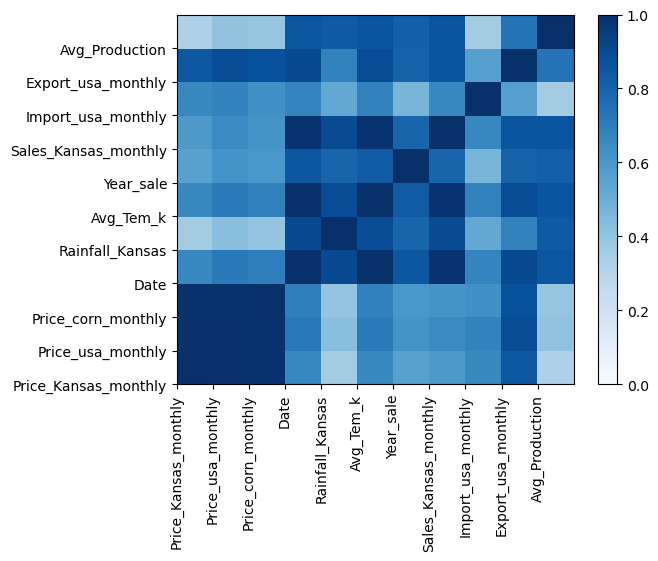

In [270]:

plt.style.use('default')
heatmap_type_2 = plt.pcolor(correlation_matrix_annual_1, cmap=plt.cm.Blues, vmin=0, vmax=1)#pseudocolor plot,cmap (colormap) 
# plot the legend on the side#lengend is juts the colorbar, giving values for color intensity颜色深浅
plt.colorbar(heatmap_type_2)

#labels

label_2=column_name_2_numeric
ax_2 = plt.gca()#retreive current labels (object). The class object of ax_1 is matplotlib.axes.Axes,
#which is a subclass of matplotlib.artist.Artist in the inheritance hierarchy.
print(ax_2.get_xticklabels())#why alreay column_name_2??
#ax_1.set_xticks(ax.get_xticks())  # Keep original x positions
#ax_1.set_yticks(ax.get_yticks())  # Keep original y positions

ax_2.set_xticks(range(len(column_name_2_numeric))) # Set the x_label positions 0-16 without matching the original (automated) one, so x, y axes has loc:0,1,...,ln(column_name_2))
ax_2.set_yticks(range(len(column_name_2_numeric)))  # Set the y_ticket positions
ax_2.set_xticklabels(label_2,rotation='vertical') #sets  labels for the x-axis tickects,# and rortate the x_stick to be vertical to ve readable
ax_2.set_yticklabels(label_2)


plt.show()

## Anuual explain
- 1. Avg_Production still has weaker linear reltaionship with other fatcors, but already higher. Note rainfall now has strong linear relationship to production.
  2. Most factros increase linear relationship as swapped to annual data. This implied that long run price trend is easier to use for wheat price in kansas.
  3. Avg_Tem_k has relationship with most factors, so avg tem is important for market dynamics.
  4. Rainfall_Kansas now stronger linear relationship with others.
  5. Long run supply is more elastic as shown above.

Use PCA and non linear transformation to decide reduce factors

## Prt 3 stock

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('kansas_wheat_stock.csv')

# Convert 'Value' to numeric and rename
df['Stock'] = df['Value'].str.replace(',', '').astype(float)
df.drop('Value', axis=1, inplace=True)

# Convert Period to proper datetime
def parse_period(row):
    month_map = {'MAR': 3, 'JUN': 6, 'SEP': 9, 'DEC': 12}
    month_abbr = row['Period'].split()[-1][:3].upper()
    return pd.Timestamp(f"{row['Year']}-{month_map[month_abbr]}-01")

df['Date'] = df.apply(parse_period, axis=1)
df['Month'] = df['Date'].dt.month_name().str[:3]  # Add Month column

# Create complete date range (2015-2024) with quarterly start in March
full_dates = pd.date_range(start='2015-03-01', end='2024-12-01', freq='QS-MAR')
full_df = pd.DataFrame({'Date': full_dates})
full_df['Year'] = full_df['Date'].dt.year
full_df['Month'] = full_df['Date'].dt.month_name().str[:3]

# Merge with original data
clean_df = full_df.merge(df, on=['Date', 'Year', 'Month'], how='left')

# Custom month ordering
month_order = ['Mar', 'Jun', 'Sep', 'Dec']
clean_df['Month'] = pd.Categorical(clean_df['Month'], categories=month_order, ordered=True)

# Add monthly average column (fix warning)
clean_df['Monthly_Avg'] = clean_df.groupby('Month', observed=False)['Stock'].transform('mean')

# Fill missing values with monthly average
clean_df['Stock'] = clean_df['Stock'].fillna(clean_df['Monthly_Avg'])

# Sort chronologically
clean_df = clean_df.sort_values(['Date']).reset_index(drop=True)

# Display cleaned data
print("\nCleaned Data Preview:")
display(clean_df[['Date', 'Stock', 'Monthly_Avg']].style.format({
    'Date': lambda x: x.strftime('%Y%m%d'),  # Format date as YYYYMMDD
    'Stock': '{:,.0f}',
    'Monthly_Avg': '{:,.0f}'
}).set_caption("Kansas Wheat Stock Data (2015-2024)").hide(axis='index'))


Cleaned Data Preview:


Date,Stock,Monthly_Avg
20150301,"184,963,000","268,969,800"
20150601,"140,126,000","207,315,600"
20150901,"378,103,000","411,405,600"
20151201,"326,249,000","337,435,600"
20160301,"260,494,000","268,969,800"
20160601,"207,867,000","207,315,600"
20160901,"531,667,000","411,405,600"
20161201,"421,027,000","337,435,600"
20170301,"367,940,000","268,969,800"
20170601,"295,991,000","207,315,600"



Basic Statistics:
                Stock     Monthly_Avg
count           40.00           40.00
mean   306,281,650.00  306,281,650.00
std    110,366,627.94   77,141,339.92
min     93,958,000.00  207,315,600.00
25%    228,792,250.00  253,556,250.00
50%    304,556,500.00  303,202,700.00
75%    382,162,250.00  355,928,100.00
max    531,667,000.00  411,405,600.00


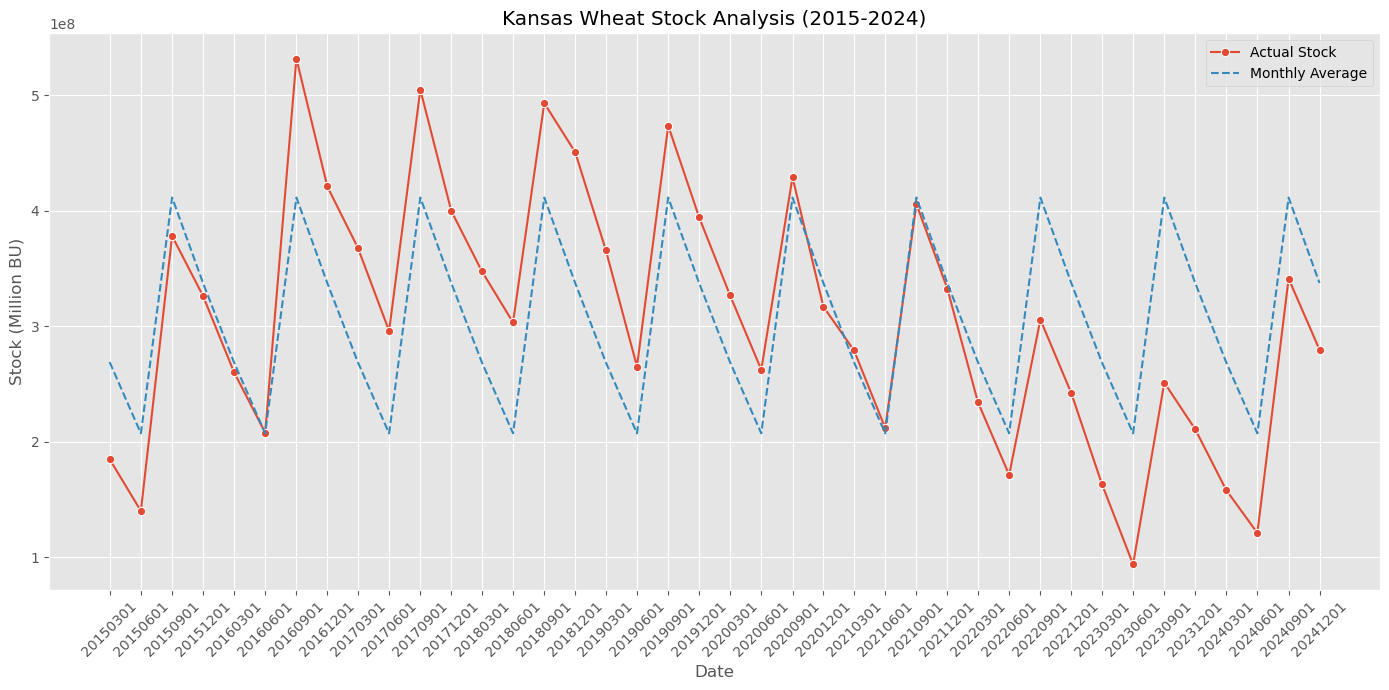

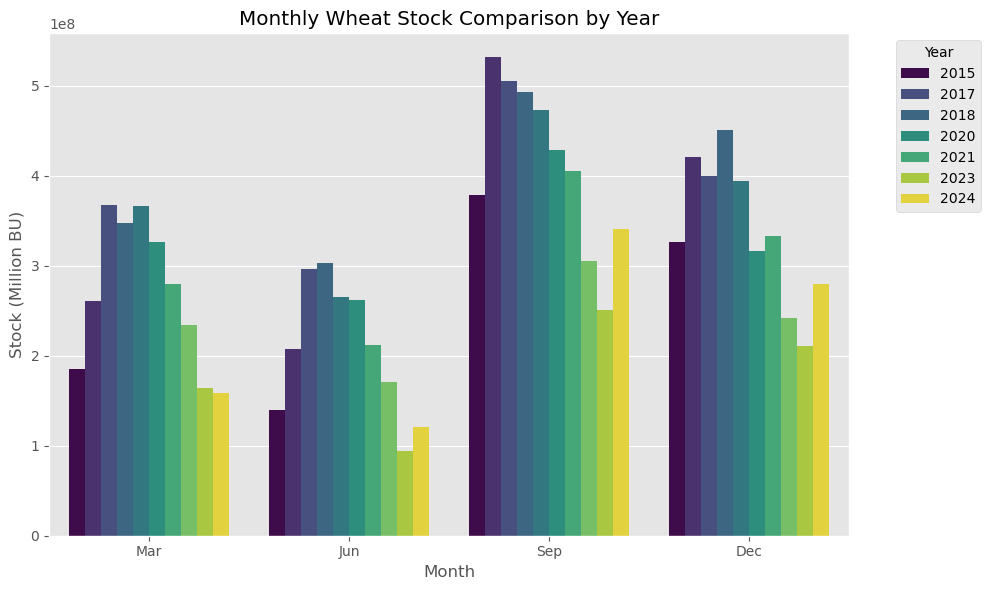

In [274]:
# Exploratory Analysis and Visualization
# Basic statistics
print("\nBasic Statistics:")
stats_df = clean_df[['Stock', 'Monthly_Avg']].describe()
print(stats_df.apply(lambda s: s.map(lambda x: f"{x:,.2f}")))  

# Time series plot with monthly averages
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='Date', y='Stock', data=clean_df, marker='o', label='Actual Stock')
sns.lineplot(x='Date', y='Monthly_Avg', data=clean_df, linestyle='--', label='Monthly Average', ax=ax)

# Format x-axis dates as YYYYMMDD
ax.set_xticks(clean_df['Date'])
ax.set_xticklabels(clean_df['Date'].dt.strftime('%Y%m%d'))

plt.title('Kansas Wheat Stock Analysis (2015-2024)')
plt.ylabel('Stock (Million BU)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Monthly comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Stock', hue='Year', 
           data=clean_df, 
           palette='viridis',
           order=['Mar', 'Jun', 'Sep', 'Dec'])

plt.title('Monthly Wheat Stock Comparison by Year')
plt.ylabel('Stock (Million BU)')
plt.xlabel('Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation**:

Inventory and monthly averages are both 40 data points, matching 10 years (2015-2024) of quarterly data (March/June/September/December).

Stock: 306.28 million BU

Monthly_Avg: 306.28 million BUs

The actual stock and the monthly average have the same mean value because we fill in missing values with the monthly average in the estimation process, which maintains the overall central tendency. The range of monthly means is narrower (207.32M to 411.41M) because we **use the mean to minimize extreme values**.

We calculate the standard deviation of variability:
Stock: ±110.37 million BU

Monthly_Avg: ±77.14 million BU

From the data, we know that the actual stock value fluctuates more sharply over time, while the monthly average is smoother due to group estimation.

Statistical Data Inventory We can observe a wide range of stock price fluctuations (93.96M to 531.67M) and a large standard deviation of the actual stock, reflecting the large impact of different seasons on the wheat stock and its annual volatility. From the Kansas Wheat Stock Analysis (2015-2024) graph we can clearly see that the stock of wheat shows a regular upward in downward trend over time. **This also shows the importance of seasonal influence on the stock, as we can see from the graph that every year there is a peak in September when the stock reaches its highest point. This indicates that September is the peak harvest season for wheat**.

From the Monthly Wheat Stock Comparison by Year graph we analyze the comparison of wheat stocks in different months every year. From the graph we can also see that no matter which year it is, wheat stocks are highest in the month of September. Furthermore, the wheat stock doesn't seem to increase with time, instead it owns plus high wheat stock around 2017. This seems to suggest that wheat stocks are not affected by vintage, but this could also be because we have so little vintage data that we cannot see the effect of vintage on wheat stocks over several years.

## Analysis Methodology

To analyze the wheat market dynamics, we will employ the following methods:
- **Time Series Forecasting**: Using Prophet , exponential smoothing models (later) to forecast wheat production and pricing trends. (the trend may suggest which regression model to  in the following steps. Here, **linear trend does not work well** as my metrics_eva_prophet_1 shows that linear trend will not work well for the price drop period. This suggest that the linear regression later will have poor performence.
- **Supply and Demand Analysis and price elasticity**: 1. Implementing basic supply-demand models using regression (optional: cost minimizing and utility maximizing) to understand how fluctuations in supply (production) and demand (consumption like sales, exports) influence prices. Ex, some policies may shift supply curve... (Econ 2010/4010) (future). 2. And price elasticity analysis can help understanding sensivity of the previous models (to max profit ex). We may need to search for additional knowledge to evaluate. 3. May **classify market structure** using methods we already have to have more accurate market dynamic analysis (future).
- **Regression Analysis**: Using regression models to quantify the impact of various factors, such as production levels, sales, weather, exports, and imports, pirce of substitues, and national production and price affect on wheat prices in Knasas. Future: Note that **PCA and other reduce dimension method** may be helpful in choosing factors to predict price, demand, and supply curves. Also, neural network may work to determine relationship and importance of different factors, may use stochatic process knowledge for equilibrium weights chaning. (Clustering may be beneficial in determining the threshold for seasonal trends for price and consumer behavior identification)
- **Evaluations and some economic analysis**:
- Using hypothesis tests and cross-validation with corresponding measurements to check overfitting and robustness for time series and other ML models. NOte: Will possile use dynamic cap for prophet model to capture non linear trend hopefully fix prophet and make it more **accurate**.
- Then, conduct some microeconomics analysis after adding market dynamics materials as stated above.
- optional: large data set tests like Wald, Score, and LRT (likelihood ratio test) may be helpful in controlling p-vals and evaluations. Combining Bayesian models with cross-validation as above. PCA for reducing factors. 5090 methods on robustness.

We will focus on modeling price formation and predicting future price trends based on historical data.



## Part I stock analysis


Regression Results:
Time Trend Coefficient: -3941565.15
Monthly Seasonality Coefficient: 44890305.15
R-squared: 0.35


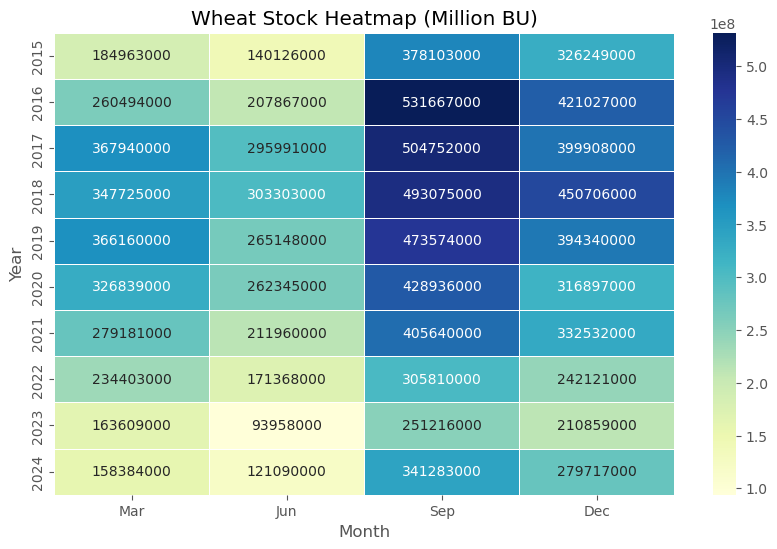

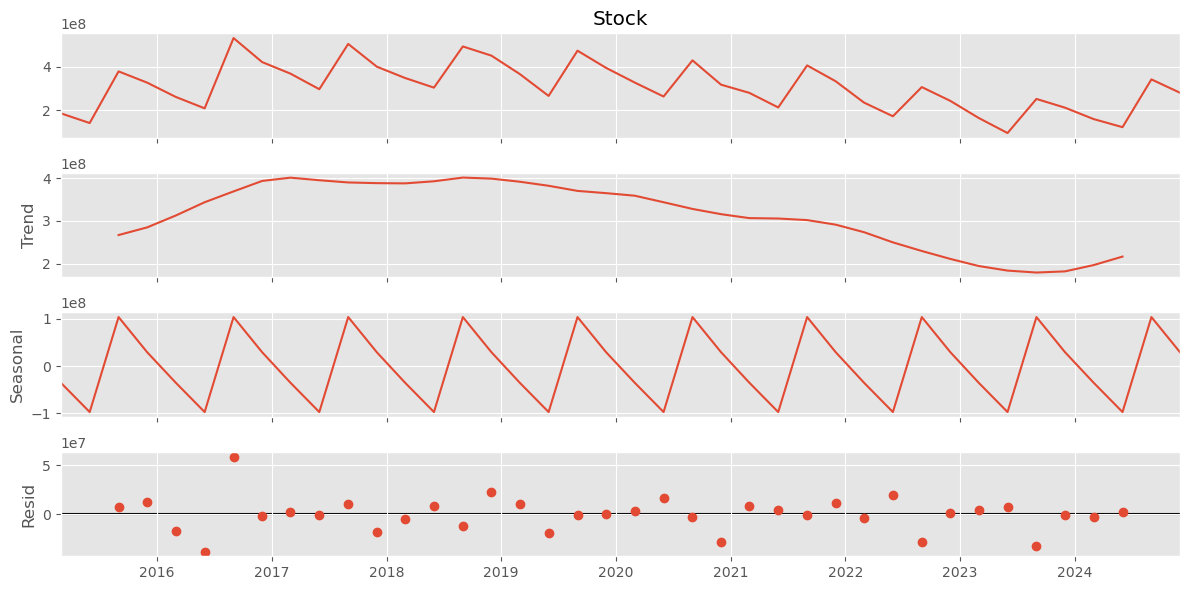

In [276]:
# Regression Analysis
# Prepare data for regression
clean_df['TimeIndex'] = np.arange(len(clean_df))
clean_df['Month_Code'] = clean_df['Month'].cat.codes  # Correct categorical encoding

X = clean_df[['TimeIndex', 'Month_Code']]
y = clean_df['Stock']

model = LinearRegression()
model.fit(X, y)

print("\nRegression Results:")
print(f"Time Trend Coefficient: {model.coef_[0]:.2f}")
print(f"Monthly Seasonality Coefficient: {model.coef_[1]:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

# Heatmap Analysis 
heatmap_data = clean_df.pivot_table(
    index='Year',
    columns='Month',
    values='Stock',
    aggfunc='mean',
    observed=False 
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[month_order], annot=True, fmt=".0f", 
            cmap='YlGnBu', linewidths=.5)
plt.title('Wheat Stock Heatmap (Million BU)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set date as index
ts_df = clean_df.set_index('Date')['Stock']

# Decompose time series
result = seasonal_decompose(ts_df, model='additive', period=4)

# Plot decomposition
result.plot()
plt.tight_layout()
plt.show()

**Interpretation**:

Time Trend Coefficient: -3,941,565.15 Explanation Wheat stocks decrease by an average of about 3.94 million BUs per quarter (3 months) with no change in seasonality, suggesting a long term downward trend in wheat stocks over the 2015-2024 period. Monthly Seasonality Coefficient: +44,890,305.15 Indicates that for each additional month in the seasonal series (Mar → Jun → Sep → Dec), stocks increase by about 44.89 million BU. similarly, the seasonal peaks can be seen in the graph indicating that the peak of stocks occurs in September and the trough occurs in June.

The R-squared of 0.35 indicates that the model explains 35% of the variation in wheat stocks. Although it makes sense, there are still many other variations of about 65% that cannot be explained, which suggests that **we need to analyze the model in conjunction with other factors (e.g., climate, demand may also affect stock levels)**.

From the heat map analysis we find a general decline in stocks over time (consistent with the negative time coefficient), with exceptions (e.g., a temporary rebound from 2021-2023).

Seasonal Decomposition of Wheat Stocks from (2016-2024) Images We decompose the wheat stock time series into three components: 
 Observed data (top panel): 
 Actual raw stock data over time. 
 Shows fluctuations in the heat map and line graph. 
 Trend (second panel): 
 The smoothed long-term pattern. 
 Key insight: The downward slope confirms the negative time coefficient of the regression. 
 Inventory declines from ~400 million units (2016) to ~200 million units (2024) - a 50% decline over 8 years. 
 Seasonality (third panel): 
 Repeats quarterly pattern. 
 Peak: December/September (post-harvest storage accumulation). 
 Trough: March/June (pre-harvest drawdown). 
 Residuals (bottom panel): 
 Unexplained variation (actual vs. forecast). 

 
**Together, the heat map and regressions highlight a system facing seasonal and long-term pressures that require targeted interventions to stabilize wheat stocks.The large residuals for 2019-2021 indicate the presence of external factors with a strong influence, and the smaller residuals after 2022 suggest a more predictable pattern. Potential drivers could be increased domestic and international demand for wheat, drought-induced declines in wheat production, a shift in people's food preferences to more nutritious substitutes, rainfall, policy changes, epidemics, etc.**

**From these two graphs we can make some good recommendations such as focusing on post-harvest storage (September/December peak) and optimizing the supply chain. Investigate the drivers of decline we summarized above and make improvements. Expand data collection to include weather, price, and export indicators.**

In [285]:
import torch
import torch.nn as nn
import torchsde

class WheatPriceSDE(nn.Module):
    noise_type = 'general'
    sde_type = 'ito'

    def __init__(self, state_size, brownian_size):
        super().__init__()

        self.mu = nn.Sequential(
            nn.Linear(state_size, 122),  # state_size =number os samples
            nn.Tanh(),
            nn.Linear(state_size, 122)
        )
        self.sigma = nn.Sequential(
            nn.Linear(state_size , 122),  # state_size + 1 (for time)
            nn.ReLU(),
            nn.Linear(122, state_size * brownian_size)
        )

    def f(self, t, y):
        t_input = t.view(-1, 1) # reshape t to match y's batch size
        yt = torch.cat([y, t_input], dim=1)
        return self.mu(yt)

    def g(self, t, y):
        t_input = t.view(-1, 1)  # reshape t to match y's batch size
        yt = torch.cat([y, t_input], dim=1)
        return self.sigma(yt).view(y.size(0), state_size, brownian_size)

# Initialize model
state_size = 1  # For wheat price as a single variable
brownian_size = 1  # For a single Brownian motion term
sde = WheatPriceSDE(state_size, brownian_size)

# Initial state y0
y0 = torch.tensor(df_kansasdata_1["Price_Kansas_monthly"].values).unsqueeze(0).float() # Convert df to tensor


# Time steps (from 1 to 121 months)
ts = torch.linspace(1, 121, 121).float()

# Solve the SDE using torchsde
ys = torchsde.sdeint(sde, y0, ts)

print(ys)



In [31]:
import pandas as pd
import numpy as np

# Load events data
events_df = pd.read_csv('factor_events.csv')

# Define impact scoring rubric
impact_mapping = {
    'drought': -2,
    'export ban': -2,
    'hurricane': -1.5,
    'flood': -1.5,
    'wildfire': -1,
    'tornado': -1,
    'policy positive': 1,
    'ethanol mandate': 0.5,
    'trade conflict': -1.5,
    'pandemic': -1,
    'crop insurance': 0.5
}

# Create impact score column
def assign_impact(event_desc):
    event_desc = event_desc.lower()
    for key, value in impact_mapping.items():
        if key in event_desc:
            return value
    return 0  # Neutral impact for unclassified events

events_df['impact_score'] = events_df['Event Description'].apply(assign_impact)

# Parse date ranges
def parse_dates(row):
    try:
        if '-' in row['Month(s)']:
            start, end = row['Month(s)'].split('-')
            months = pd.date_range(start=f"{row['Year']}-{start}", 
                                 end=f"{row['Year']}-{end}", 
                                 freq='MS').strftime('%Y-%m').tolist()
        else:
            months = [f"{row['Year']}-{row['Month(s)']}"]
        return months
    except:
        return []

events_df['date_range'] = events_df.apply(parse_dates, axis=1)

In [32]:
import pandas as pd

# Load event dataset first (assuming it's already loaded as `events_df`)
# Make sure to define your `season_map` accordingly
season_map = {
    'Winter': 1,
    'Spring': 3,
    'Summer': 6,
    'Fall': 9,
    # Add month names if needed, e.g.:
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

# Function to parse Month(s) to date ranges
def parse_seasonal_dates(row):
    try:
        month_field = row['Month(s)']
        if pd.isna(month_field):
            return []

        if '-' in str(month_field):
            # Handle seasonal range
            parts = str(month_field).split('-')
            if len(parts) != 2:
                return []
            start_season, end_season = parts
            start_month = season_map.get(start_season.strip(), 1)
            end_month = season_map.get(end_season.strip(), 12)
            return pd.date_range(
                start=f"{int(row['Year'])}-{start_month:02d}-01",
                end=f"{int(row['Year'])}-{end_month:02d}-01",
                freq='MS'
            ).strftime('%Y-%m').tolist()
        else:
            month = season_map.get(str(month_field).strip(), None)
            if month is None:
                return []
            return [f"{int(row['Year'])}-{str(month).zfill(2)}"]
    except Exception as e:
        print(f"Error processing row {row.name}: {e}")
        return []

# Apply date parsing
events_df['date_range'] = events_df.apply(parse_seasonal_dates, axis=1)

# Expand and convert date
events_expanded = events_df.explode('date_range')
events_expanded['date'] = pd.to_datetime(events_expanded['date_range'], format='%Y-%m', errors='coerce')
events_expanded = events_expanded.dropna(subset=['date'])

# Group impact scores by date
global_factors = events_expanded.groupby('date')['impact_score'].sum().reset_index()

# Load main dataset
main_df = pd.read_csv('df_kansasdata_1_copy_1.csv')
main_df['date'] = pd.to_datetime(main_df['Time_plot'])

# Inspect and fix date column
if 'date' not in main_df.columns:
    print("Columns in the main dataset:", main_df.columns)
    # Try creating a datetime column from available info
    if {'Year', 'Month'}.issubset(main_df.columns):
        main_df['date'] = pd.to_datetime(main_df[['Year', 'Month']].assign(DAY=1))
    else:
        raise ValueError("Main dataset lacks 'date' or ('Year' and 'Month') columns")

# Merge and fill missing values
merged_df = pd.merge(main_df, global_factors, on='date', how='left')
merged_df['global_factor'] = merged_df['impact_score'].fillna(0)
merged_df = merged_df.drop(columns=['impact_score'])

# Save merged data
merged_df.to_csv('enhanced_kansas_data.csv', index=False)

# Print verification
print(f"Merged dataset shape: {merged_df.shape}")
print("Date range:", merged_df['date'].min(), "to", merged_df['date'].max())
print("Global factor summary:\n", merged_df['global_factor'].describe())


Error processing row 10: invalid literal for int() with base 10: '2007-2008'
Error processing row 16: invalid literal for int() with base 10: '2010-2011'
Merged dataset shape: (272, 23)
Date range: 2002-06-01 00:00:00 to 2025-01-01 00:00:00
Global factor summary:
 count    272.000000
mean      -0.490809
std        0.889104
min       -3.500000
25%       -1.000000
50%        0.000000
75%        0.000000
max        0.500000
Name: global_factor, dtype: float64


In [36]:
# Identify and encode categorical variables (excluding non-feature columns)
cat_cols = merged_df.select_dtypes(include='object').columns.difference(['Time_plot'])

if not cat_cols.empty:
    merged_df = pd.get_dummies(merged_df, columns=cat_cols, drop_first=True)

print(merged_df.columns)

Index(['Time_plot', 'Year', 'Price_Kansas_monthly', 'Price_usa_monthly',
       'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k',
       'Year_sale', 'Sales_Kansas_monthly', 'Import_usa_monthly',
       'Export_usa_monthly', 'Avg_Production', 'Annual_Production',
       'Sales_Kansas_monthly_approx',
       'Price Elasticity of Demand(sales by time', 'date', 'global_factor',
       'Period_AUG', 'Period_DEC', 'Period_FEB', 'Period_JAN', 'Period_JUL',
       'Period_JUN', 'Period_MAR', 'Period_MAY', 'Period_NOV', 'Period_OCT',
       'Period_SEP', 'Period_sale_AUG', 'Period_sale_DEC', 'Period_sale_FEB',
       'Period_sale_JAN', 'Period_sale_JUL', 'Period_sale_JUN',
       'Period_sale_MAR', 'Period_sale_MAY', 'Period_sale_NOV',
       'Period_sale_OCT', 'Period_sale_SEP'],
      dtype='object')


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define target and features
target_col = 'Price_Kansas_monthly'
features = merged_df.drop(columns=['date', 'Time_plot', target_col])

X = features
y = merged_df[target_col]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Show top coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

R² Score: 0.9512133249424334
RMSE: 0.396228934562031
                        Feature  Coefficient
1             Price_usa_monthly     1.801307
6                     Year_sale    -0.178604
20                   Period_JUN     0.130156
12  Sales_Kansas_monthly_approx    -0.119496
24                   Period_OCT     0.102140
5                     Avg_Tem_k    -0.099613
7          Sales_Kansas_monthly     0.084746
35              Period_sale_OCT    -0.084495
30              Period_sale_JUL     0.083371
8            Import_usa_monthly    -0.081174
